**Exploratory Data Analysis (EDA)**

In [2]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pkg

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install calendar

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement calendar (from versions: none)
ERROR: No matching distribution found for calendar


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [32]:
data = pd.read_csv(r'C:\Users\user\Desktop\data\ind_uber_drives_2016.csv')

In [33]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [35]:
data.shape

(1156, 7)

In [36]:
print(data.isnull().sum())

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [37]:
data = data.dropna()

In [38]:
print(data.isnull().sum())

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64


In [39]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [40]:
# Break up date columns 

# Convert to datetime 
data['START_DATE'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [41]:
data.dtypes

START_DATE*            object
END_DATE*              object
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
START_DATE     datetime64[ns]
END_DATE       datetime64[ns]
dtype: object

In [42]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00


In [51]:
# Testers
data['START_DATE'].iloc[3]
data['START_DATE'].iloc[3].dayofweek
calendar.day_name[data['START_DATE'].iloc[3].dayofweek]



'Wednesday'

In [54]:
# Break apart into components 

# Alternative script: data['HOUR'] = [x.hour for x in data['START_DATE']]
data['HOUR'] = data['START_DATE'].apply(lambda x: x.hour)
data['DAY'] = data['START_DATE'].apply(lambda x: x.day)
data['MONTH']  = data['START_DATE'].apply(lambda x: x.month)
data['WEEKDAY'] = data['START_DATE'].apply(lambda x: calendar.day_name[x.dayofweek])
data['DAY_OF_WEEK'] = data['START_DATE'].apply(lambda x: x.dayofweek)



In [55]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21,1,1,Friday,4
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20,2,1,Saturday,5
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17,5,1,Tuesday,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14,6,1,Wednesday,2
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,17,6,1,Wednesday,2


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

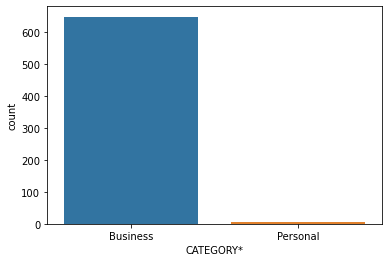

In [56]:
# Count frequency of type of trips

sns.countplot(x = 'CATEGORY*', data = data)


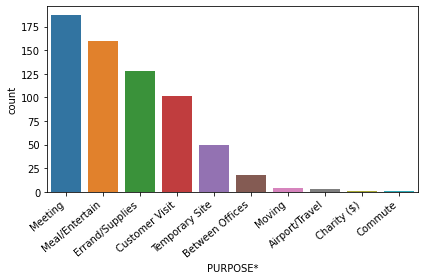

In [63]:
ax = sns.countplot(x = 'PURPOSE*', data = data, order = data['PURPOSE*'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Mostly attends meetings and entertains clients (possibly prospective new clients). The individual may be in some sort of business whereby relationships are integral. I speculate that this may be an entrepreneur, consultant or someone within a managerial role of soe sort.


<AxesSubplot:ylabel='Frequency'>

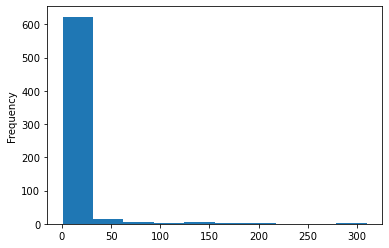

In [64]:
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips vs. hours')

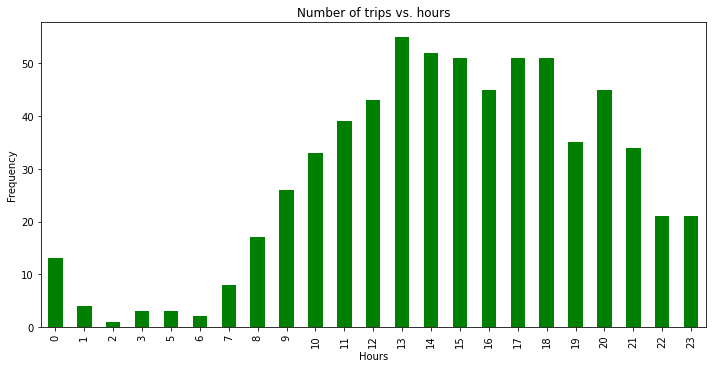

In [97]:
# Most frequent travel hours
hours = data['HOUR'].value_counts() # How often the hour 'pops up'
hours.sort_index().plot(kind = 'bar', color = 'green', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs. hours')

Typically travels around lunch time and towards teh evening. This is expected given the previous information (frequency of lunch meetings). 

Text(0.5, 1.0, 'Number of trips vs. days')

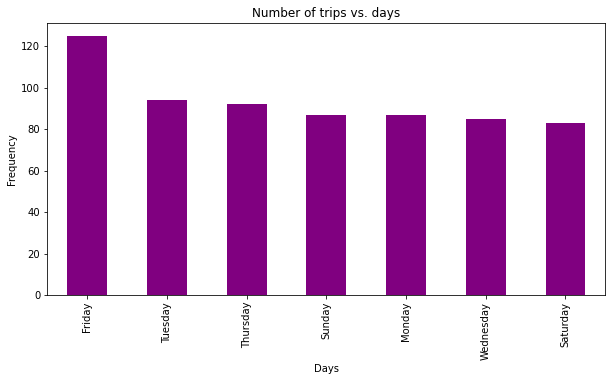

In [78]:
# Frequency of different days of the week

days = data['WEEKDAY'].value_counts()
days.plot(kind = 'bar', color = 'purple',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days')

([<matplotlib.axis.XTick at 0x1cce835ea90>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Oct'),
  Text(9, 0, 'Nov'),
  Text(10, 0, 'Dec')])

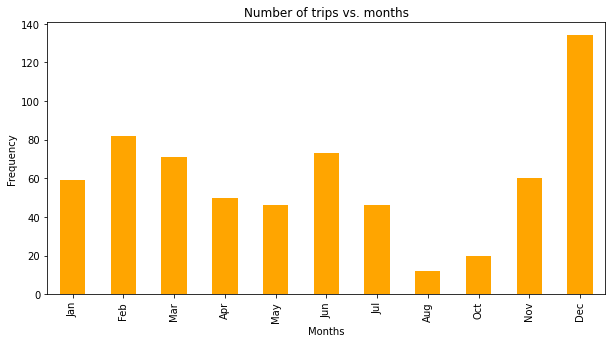

In [110]:
ax1 = plt.subplot()
months = data['MONTH'].value_counts()
months.sort_index().plot(kind = 'bar', color = 'orange',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips vs. months')
plt.xticks((0,1, 2, 3, 4, 5, 6,7,8,9,10), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Oct','Nov','Dec'))
#labels = ['January','Febraury','March','April','May','June','July','August','October','November','December']

#ax1.set_xticks(months)
#ax1.set_xticklabels(labels)






The month of September has no trips taken which may indicate a break time. 
Most trips were taken in Decemeber. This needs to be investgated further.

Text(0.5, 1.0, 'Number of trips vs. days in December')

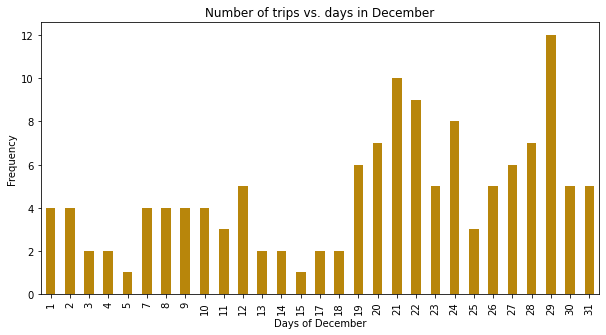

In [112]:
months = data['DAY'][data['MONTH']==12].value_counts()
months.sort_index().plot(kind = 'bar', color = 'darkgoldenrod',figsize=(10,5))
plt.xlabel('Days of December')
plt.ylabel('Frequency')
plt.title('Number of trips vs. days in December')

Most trips taekn towards the end of the month of December. 
The business may have picked up during the festive season as most trips taken were for business purposes.

Text(0.5, 1.0, 'Frequency of pickup points')

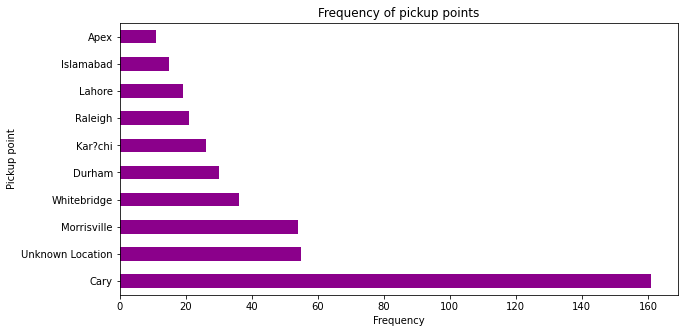

In [120]:
months = data['START*'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'darkmagenta',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup point')
plt.title('Frequency of pickup points')

Judging by the number of trips from Cary the individual most likely lives or has offices based here.

Text(0.5, 1.0, 'Frequency of dropoff points')

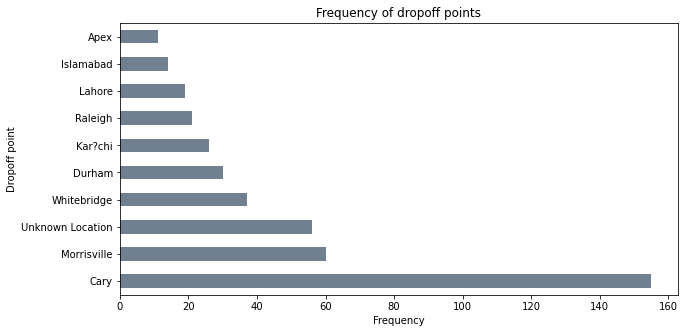

In [126]:
months = data['STOP*'].value_counts().nlargest(10)
months.plot(kind = 'barh', color = 'slategray',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Dropoff point')
plt.title('Frequency of dropoff points')

The user takes trips within the proximity of their work/living place.

Text(0.5, 1.0, 'Frequency of dropoff points')

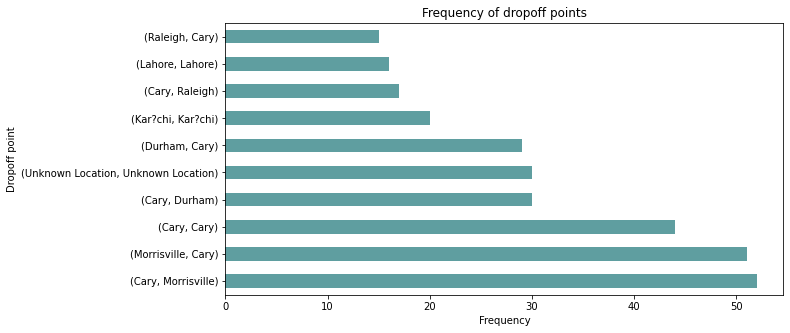

In [131]:
# Combination 

data.groupby('START*')['STOP*'].value_counts().nlargest(10).plot(kind = 'barh', color = 'cadetblue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Dropoff point')
plt.title('Frequency of dropoff points')
        
        


Most trips taken are between Cary and Morrisville. This may be where the restaurant or bar for entertaining clients is located.